# Multi Armed Bandit Problem

The detailed explanation of this problem can been seen in the charpter 2 of [Reinforcement Learning: An Introduction (2nd edition)](http://incompleteideas.net/book/the-book-2nd.html).

## Some definitions about variables 

### Action-value Methods
Expected reward of selecting $\textbf{a}$ as the action:   
$$q_*(a)=E[R_t\mid A_t=a]$$    
The value of action $\textbf{a}$ in the step t:    
$$Q_t(a)=\frac{\sum_{i=1}^{t-1}{R_iI_{A_i=a}}}{\sum_{i=1}^{t-1}{I_{A_i=a}}}=\frac{\text{sum of the rewards when taken $\textbf{a}$ prior to t}}{\text{sum of times taken $\textbf{a}$ prior to t}}$$     
$$\begin{equation}
I_{A_i=a}=\begin{cases}
1,&\text{if taken $\textbf{a}$ in step i} \cr 0,&\text{else}
\end{cases}
\end{equation}$$


### $\epsilon$-Greedy Action Selection
We want to maximize the $Q_t(a)$ because when step t goes to infinity, the value of action $\textbf{a}$ will be close to the expexted reward.    
Greedy action selection:
$$A_t=A_t^*=\underset{a}{argmax{Q_t(a)}}$$
$\epsilon$-Greedy Action Selection:   
$$\begin{equation}
A_{t}=\begin{cases}
A_t^*,&\text{with probability $1-\epsilon$} \\ \text{random action},&\epsilon
\end{cases}
\end{equation}$$



### 10-Armed Bandit Testbed
We set the environment and the agent for this test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rl_class


In [2]:
loop = 100
test_a = rl_class.Agent(0.1)
step = 1000
average_reward=np.zeros(step)
optimal_action=np.zeros(step)
for i in range(loop):
    average_reward_1 = []
    optimal_action_1 = []
    test_a.agent_reset()
    while test_a.step < step:
        test_a.update_state()
        test_a.take_action()
        average_reward_1=np.append(average_reward_1, test_a.get_average_reward())
        optimal_action_1=np.append(optimal_action_1, test_a.get_optimal_action())
    average_reward += np.array(average_reward_1)
    optimal_action += np.array(optimal_action_1)
average_reward /= loop
optimal_action /= loop

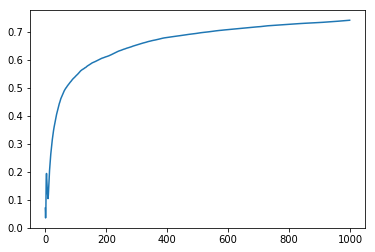

In [3]:
plt.plot(np.arange(step),optimal_action)

# Dynamic Programming

## Grid World

We ususally assume that the environment is finite MDP. We firstly make prediction by policy evaluation, then we use policy improvement to improve thr policy of agents. However, must we wait for the entire convergence of the state or can we make it short? We use value iteration in the last part of the [chapter 4](http://incompleteideas.net/book/the-book-2nd.html).

For the policy evaluation:
We iterate the state($V_s$) by k. We have known that the current state of s can relation with the next state $V_s'$, which is hard to calculate in the real world. 
$$v_{\pi}(s)=\sum_{a}{\pi(a|s)}\sum_{s',r}{p(s',r|s,a)}(r+\gamma(v_{\pi}(s')))$$    
We use the iteration in the way below:
We use $v_0(s)=0$
$$v_{k+1}(s)=\sum_{a}{\pi(a|s)}\sum_{s',r}{p(s',r|s,a)}(r+\gamma(v_{k}(s')))$$    
The policy iteration in the improvement:    
$$\pi'(s)=\underset{a}{argmax} \sum_{s',r}{p(s',r|s,a)}(r+\gamma(v_{\pi}(s')))$$   
Then we have the value iteration:
$$v_{k+1}(s)=\underset{a}max\sum_{s',r}{p(s',r|s,a)}(r+\gamma(v_{k}(s')))$$ 

In [6]:
gridworld = rl_class.GridWorld_DP()
delta = 999
threshold = 0.1
K=0
while delta > threshold:
    delta = 0
    V = gridworld.get_Vs()
    print("K=",K)
    print(np.reshape(V,(4,4)))
    next_v = gridworld.policy_evaluation()
    K+=1
    gridworld.set_vs(next_v)
    delta = max([delta,np.max(np.abs(next_v-V))])
print("The evaluation converges at last!")

K= 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
K= 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
K= 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]
K= 3
[[ 0.   -2.44 -2.94 -3.  ]
 [-2.44 -2.88 -3.   -2.94]
 [-2.94 -3.   -2.88 -2.44]
 [-3.   -2.94 -2.44  0.  ]]
K= 4
[[ 0.   -3.06 -3.84 -3.97]
 [-3.06 -3.72 -3.91 -3.84]
 [-3.84 -3.91 -3.72 -3.06]
 [-3.97 -3.84 -3.06  0.  ]]
K= 5
[[ 0.   -3.66 -4.7  -4.9 ]
 [-3.66 -4.49 -4.78 -4.7 ]
 [-4.7  -4.78 -4.49 -3.66]
 [-4.9  -4.7  -3.66  0.  ]]
K= 6
[[ 0.   -4.21 -5.51 -5.8 ]
 [-4.21 -5.22 -5.6  -5.51]
 [-5.51 -5.6  -5.22 -4.21]
 [-5.8  -5.51 -4.21  0.  ]]
K= 7
[[ 0.   -4.73 -6.28 -6.65]
 [-4.74 -5.9  -6.36 -6.28]
 [-6.28 -6.36 -5.9  -4.73]
 [-6.66 -6.28 -4.73  0.  ]]
K= 8
[[ 0.   -5.23 -7.   -7.47]
 [-5.23 -6.55 -7.09 -7.  ]
 [-7.01 -7.09 -6.54 -5.23]
 [-7.47 -7.01 -5.23  0.  ]]
K= 9
[[ 0.   -5.7  -7.7  -8.24]
 [-5.7  -7.16 -7.77 -7

## policy improvement

In [5]:
Direction = np.array(['UP','RIGHT','DOWN','LEFT'])
gridworld = rl_class.GridWorld_DP()
delta = 999
threshold = 0.01
K=0
old_action = gridworld.get_pis()
new_action = np.array(old_action)+1
while np.sum(old_action - new_action):
    # policy evaluation
    while delta > threshold:
        delta = 0
        V = gridworld.get_Vs()
        # print("K=",K)
        # print(np.reshape(V,(4,4)))
        next_v = gridworld.policy_evaluation()
        gridworld.policy_improvement()

        K+=1
        gridworld.set_vs(next_v)
        delta = max([delta,np.max(np.abs(next_v-V))])

    # policy improvement

    old_action = gridworld.get_pis()
    gridworld.policy_improvement()
    new_action = gridworld.get_pis()

    # focus on the state 9
    print("DIRECTION IN STATE 9:",Direction[gridworld.Policy[9]!=0])


print(np.reshape(gridworld.get_Vs(),(4,4)))
print("The evaluation converges at last!")

DIRECTION IN STATE 9: ['UP' 'RIGHT']
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
The evaluation converges at last!


## Value iteration